# Fitting a polynomial to a set of points

Given data out in the wild a common task is to fit a polynomial function. Numpy offers some convenient functions to get the job done. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

### Generating data

We will create some mock data to explore polynomial fitting

In [2]:
# The unknown function we are trying to fit
f = lambda x: (x-3)**2

# Generating the sample points
x = np.linspace(0, 5, 20)

# Adding gaussian noise to x and f(x)
np.random.seed(123456)
noise_x = np.random.normal(0, .1, len(x))
noise_y = np.random.normal(0, .5, len(x))
data_x = x + noise_x
data_y = f(x) + noise_y

Let's assume that this is our starting point. We are given some data and we wish to fit a polynomial. I always recommend plotting you data first!

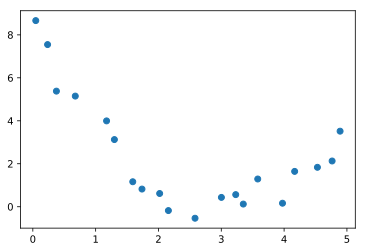

In [3]:
plt.plot(data_x, data_y, 'o')

Now that we can see out data it's time to fit!

### Polynomial Fitting

The `np.polyfit` function is exactly what we want. Given a set of $xy$ points and a polynomial degree, `np.polyfit` returns the coefficients of the best fit. Lets see it in action

In [4]:
coeff = np.polyfit(data_x, data_y, deg=2)
print(coeff)

[ 0.94969091 -5.707748    8.46536612]


The coefficients are returned from highest to lowest power (**note**: The order of the coefficients is imporant). We can now use these coefficients to evaluate the polynomial.

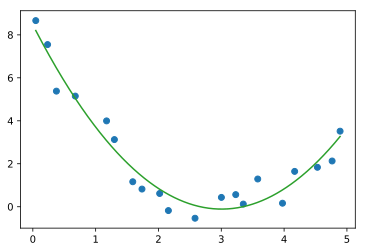

In [5]:
# Polynomial Function
p2 = lambda x: coeff[0]*x**2 + coeff[1]*x + coeff[2]

# Points to evaluate
xp = np.linspace(min(data_x), max(data_x), 500)

# Plotting result
plt.plot(data_x, data_y, 'o')
plt.plot(xp, p2(xp), color='C2')

### WAIT!

While what we have done has worked there is a flaw in our method. By handcrafting the polynomial function we have lost flexibility. If I want a 7th degree fit then we waste lots of time writing up a 7th degree polynomial function and introduce the possiblity for errors. The `np.poly1d` function creates polynomial functions from the list of coefficients directly. Here the order matters and luckily `np.poly1d` expects the polynomial’s coefficients in decreasing powers which is exactly what `np.polyfit` returns. Lets create that 7th order polynomial fit

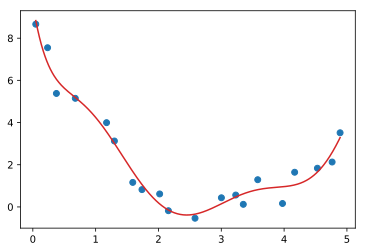

In [6]:
p7 = np.poly1d(np.polyfit(data_x, data_y,  7))
xp = np.linspace(min(data_x), max(data_x), 500)

plt.plot(data_x, data_y, 'o')
plt.plot(xp, p7(xp), color='C3')

Now we have a flexible procedure to do polynomial fitting. We can put this procedure into a loop and plot many polynomial fits

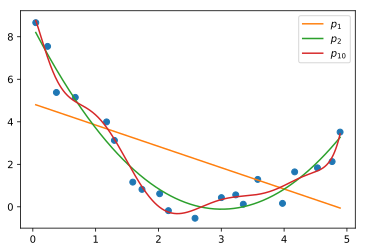

In [7]:
plt.plot(data_x, data_y, 'o')
xp = np.linspace(min(data_x), max(data_x), 500)
for degree in [1, 2, 10]:
    pn = np.poly1d(np.polyfit(data_x, data_y,  degree))
    plt.plot(xp, pn(xp), label='$p_{{{}}}$'.format(degree))
plt.legend()

There are many things one can do from here. Visualizing the error of the fit would be interesting, determining which fit is the best fit is important, but I will leave that for another post. Enjoy fitting polynomial to all of the things!